In [1]:
# !pip install tensorflow==2.2.0

In [1]:
#libraries import
from scipy.io import wavfile

import scipy.io as sio
import librosa
import pywt
from librosa import display
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, arange, signal
from statsmodels import api as sm
plt.style.use('seaborn-poster')
%matplotlib inline

In [2]:
# !pip install seaborn
# !pip install opencv-python

In [3]:
import PIL
%pylab
import glob
import scipy.ndimage
from scipy.ndimage.interpolation import zoom
#from scipy.misc import imresize
import pandas as pd
# import seaborn as sns
from PIL import Image
import cv2
# sns.set_style('white')
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\rahul\anaconda3\envs\new\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['display', 'fft', 'arange']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
!pip install keras

In [5]:
import matplotlib.pyplot as plt
# import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout,Activation 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix


import cv2
import os

import numpy as np

In [6]:
labels = ['N','AS','MVP','MR','MS']
image_list = []

def get_data(data_dir):
    data = [] 
    i=0
    j=0
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        print(i)
        i=i+1
        for img in os.listdir(path):          
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (224,224)) # Reshaping images to preferred size
                data.append([resized_arr,'image_'+str(j), label])
                j=j+1
                # image_list.append(resized_arr)

            except Exception as e:
                print(e)
    return np.array(data)

In [7]:
from sklearn.model_selection import train_test_split
X = get_data('C:/Users/rahul/Downloads/CycleScalograms/')
f=pd.DataFrame(X)
f.head()

0
1
2
3
4


C:\Users\rahul\anaconda3\envs\new\lib\site-packages\ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


,0,1,2
0,"[[[0, 0, 135], [0, 0, 135], [0, 0, 135], [0, 0...",image_0,N
1,"[[[0, 0, 135], [0, 0, 135], [0, 0, 135], [0, 0...",image_1,N
2,"[[[0, 0, 135], [0, 0, 135], [0, 0, 135], [0, 0...",image_2,N
3,"[[[0, 0, 135], [0, 0, 135], [0, 0, 135], [0, 0...",image_3,N
4,"[[[0, 0, 135], [0, 0, 135], [0, 0, 135], [0, 0...",image_4,N


In [8]:
# f.shape
f.columns = ['scalogram','image_no', 'label']

<AxesSubplot:>

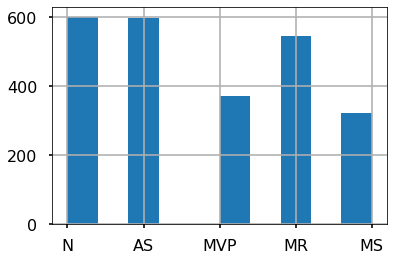

In [9]:
f.label.hist()

In [10]:
f1=f.iloc[:,1:]
f2=f.iloc[:,0]
dummies = pd.get_dummies(f1, columns = ['label'], )
one_hot_labels =array(dummies.drop('image_no', axis = 1))
dummies

,image_no,label_AS,label_MR,label_MS,label_MVP,label_N
0,image_0,0,0,0,0,1
1,image_1,0,0,0,0,1
2,image_2,0,0,0,0,1
3,image_3,0,0,0,0,1
4,image_4,0,0,0,0,1
...,...,...,...,...,...,...
2430,image_2430,0,0,1,0,0
2431,image_2431,0,0,1,0,0
2432,image_2432,0,0,1,0,0
2433,image_2433,0,0,1,0,0


In [11]:
one_hot_labels

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [12]:
f2.head()

0    [[[0, 0, 135], [0, 0, 135], [0, 0, 135], [0, 0...
1    [[[0, 0, 135], [0, 0, 135], [0, 0, 135], [0, 0...
2    [[[0, 0, 135], [0, 0, 135], [0, 0, 135], [0, 0...
3    [[[0, 0, 135], [0, 0, 135], [0, 0, 135], [0, 0...
4    [[[0, 0, 135], [0, 0, 135], [0, 0, 135], [0, 0...
Name: scalogram, dtype: object

In [13]:
# f2=pd.DataFrame(f2)

In [14]:
path_test = "C:/Users/rahul/Downloads/CycleScalograms"

In [15]:
CATEGORIES = ["N","AS","MR","MS","MVP"]
img_array=f2
print(img_array.shape)
IMG_SIZE =100
image_list=[]
for image in f2:
    img = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image_list.append(img)


(2435,)


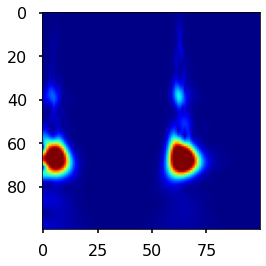

In [16]:
plt.imshow(image_list[5])
print()

In [17]:
training = []
def createTrainingData():
  for category in CATEGORIES:
    path = os.path.join(path_test, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training.append([new_array, class_num])
createTrainingData()

In [18]:
random.shuffle(training)

In [19]:
training[1]

[array([[[135,   0,   0],
         [135,   0,   0],
         [135,   0,   0],
         ...,
         [135,   0,   0],
         [135,   0,   0],
         [135,   0,   0]],
 
        [[135,   0,   0],
         [135,   0,   0],
         [135,   0,   0],
         ...,
         [135,   0,   0],
         [135,   0,   0],
         [135,   0,   0]],
 
        [[135,   0,   0],
         [135,   0,   0],
         [135,   0,   0],
         ...,
         [135,   0,   0],
         [135,   0,   0],
         [135,   0,   0]],
 
        ...,
 
        [[151,   0,   0],
         [151,   0,   0],
         [151,   0,   0],
         ...,
         [135,   0,   0],
         [135,   0,   0],
         [135,   0,   0]],
 
        [[156,   0,   0],
         [156,   0,   0],
         [160,   0,   0],
         ...,
         [135,   0,   0],
         [135,   0,   0],
         [135,   0,   0]],
 
        [[159,   0,   0],
         [159,   0,   0],
         [159,   0,   0],
         ...,
         [135,   0,   0],
  

In [20]:
X =[]
y =[]
for features, label in training:
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [21]:
# !pip install tensorflow==2.1.0 --user

In [22]:
X = X.astype('float32')
X /= 255
from keras.utils import np_utils
Y = np_utils.to_categorical(y,5)
print(Y[100])
print(shape(Y))


[0. 0. 1. 0. 0.]
(2435, 5)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [24]:
# X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
# X_test= X_test.reshape((X_test.shape[0], 28, 28, 1))

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(f.iloc[:,0], f.iloc[:,1], test_size=0.33)

In [26]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
print("X_test shape", X_val.shape)
print("y_test shape", y_val.shape)

X_train shape (1551, 100, 100, 3)
y_train shape (1551, 5)
X_test shape (366, 100, 100, 3)
y_test shape (366, 5)
X_test shape (518, 100, 100, 3)
y_test shape (518, 5)


In [27]:
X_train

array([[[[0.5294118 , 0.        , 0.        ],
         [0.5294118 , 0.        , 0.        ],
         [0.5294118 , 0.        , 0.        ],
         ...,
         [0.5294118 , 0.        , 0.        ],
         [0.5294118 , 0.        , 0.        ],
         [0.5294118 , 0.        , 0.        ]],

        [[0.5294118 , 0.        , 0.        ],
         [0.5294118 , 0.        , 0.        ],
         [0.5294118 , 0.        , 0.        ],
         ...,
         [0.5294118 , 0.        , 0.        ],
         [0.5294118 , 0.        , 0.        ],
         [0.5294118 , 0.        , 0.        ]],

        [[0.5294118 , 0.        , 0.        ],
         [0.5294118 , 0.        , 0.        ],
         [0.5294118 , 0.        , 0.        ],
         ...,
         [0.5294118 , 0.        , 0.        ],
         [0.5294118 , 0.        , 0.        ],
         [0.5294118 , 0.        , 0.        ]],

        ...,

        [[0.627451  , 0.        , 0.        ],
         [0.627451  , 0.        , 0.        ]

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K

earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [29]:
K.clear_session()

In [30]:
model = Sequential()
# model.add(Dropout(0.3, input_shape=((100,100, 3))))
model.add(Conv2D(32, (3, 3), input_shape=(100,100, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

In [31]:
model.add(Flatten())  #3D feature maps to 1D feature vectors
model.add(Dense(32, kernel_regularizer= 'l2'))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(5, kernel_regularizer= 'l2'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'],)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          1

In [34]:
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size = 400, epochs = 20, verbose = 1, validation_data = (X_val, y_val))

Epoch 1/20
4/4 [==============================] - 4s 1s/step - loss: 1.7322 - accuracy: 0.5397 - val_loss: 1.3073 - val_accuracy: 0.7838
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 1.3951 - accuracy: 0.6402 - val_loss: 1.0060 - val_accuracy: 0.8707
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 1.1939 - accuracy: 0.7131 - val_loss: 0.8270 - val_accuracy: 0.8900
Epoch 4/20
4/4 [==============================] - 4s 1s/step - loss: 1.0432 - accuracy: 0.7653 - val_loss: 0.6676 - val_accuracy: 0.9151
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.9388 - accuracy: 0.7801 - val_loss: 0.5938 - val_accuracy: 0.9324
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.8705 - accuracy: 0.7943 - val_loss: 0.5130 - val_accuracy: 0.9498
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 0.7999 - accuracy: 0.8124 - val_loss: 0.4711 - val_accuracy: 0.9479
Epoch 8/20
4/4 [=========================

In [35]:
# evaluate the model
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)
print(train_acc,test_acc)

[0.2531481385231018, 0.978723406791687] [0.25248390436172485, 0.9836065769195557]


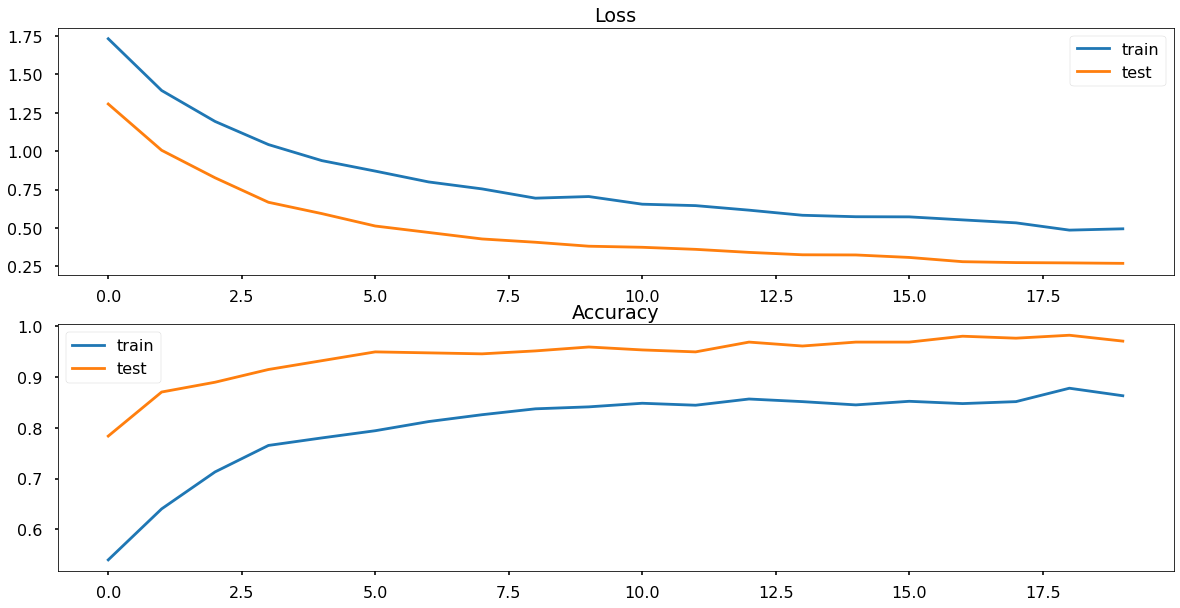

In [36]:
# plot loss during training
fig=pyplot.figure(figsize=(20,10))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [37]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

In [38]:
testX=X_test
trainX=X_train
testy=y_test
trainy=y_train
# predict probabilities for test set
y_pred = model.predict(testX, verbose=0)
print(y_pred.shape,testy.shape)
y_p=np.argmax(y_pred, axis=1)
y_t=np.argmax(y_test, axis=1)

cm = confusion_matrix(y_t, y_p)
print(cm)

(366, 5) (366, 5)
[[91  0  0  0  0]
 [ 0 85  4  0  0]
 [ 0  0 86  0  1]
 [ 0  0  0 46  0]
 [ 1  0  0  0 52]]


In [39]:
y_p

array([3, 0, 2, 2, 0, 1, 2, 0, 2, 3, 1, 0, 3, 0, 2, 0, 0, 0, 1, 1, 2, 0,
       0, 0, 2, 0, 3, 1, 4, 4, 4, 1, 0, 0, 0, 0, 1, 1, 3, 1, 0, 0, 1, 0,
       2, 1, 0, 1, 1, 3, 4, 1, 1, 2, 0, 0, 0, 1, 2, 3, 2, 4, 0, 2, 1, 4,
       3, 0, 1, 3, 3, 1, 0, 4, 2, 0, 3, 1, 3, 3, 0, 2, 2, 2, 0, 3, 1, 1,
       0, 1, 1, 0, 1, 2, 0, 4, 0, 4, 2, 0, 3, 1, 2, 3, 2, 4, 0, 1, 2, 1,
       2, 2, 2, 0, 4, 1, 1, 2, 4, 1, 4, 1, 0, 2, 2, 2, 2, 0, 1, 0, 4, 0,
       0, 2, 0, 0, 2, 1, 4, 1, 2, 0, 4, 3, 1, 3, 3, 3, 1, 3, 2, 2, 3, 3,
       3, 3, 1, 3, 0, 1, 1, 4, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 0, 4, 3, 2,
       3, 2, 3, 2, 1, 3, 1, 1, 4, 2, 1, 1, 0, 1, 1, 2, 2, 2, 4, 4, 1, 2,
       1, 4, 3, 0, 1, 2, 1, 0, 2, 2, 2, 2, 4, 0, 0, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 3, 3, 4, 0, 0, 0, 4, 4, 0, 2, 4, 1, 0, 0, 2, 0, 2, 1, 1, 4,
       0, 4, 3, 2, 2, 1, 1, 4, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 4, 2, 1, 4,
       4, 3, 3, 4, 2, 4, 1, 1, 4, 2, 0, 2, 4, 1, 1, 2, 0, 1, 0, 2, 4, 0,
       0, 1, 0, 0, 0, 0, 4, 2, 2, 4, 2, 4, 0, 1, 3,

[[91  0  0  0  0]
 [ 0 85  4  0  0]
 [ 0  0 86  0  1]
 [ 0  0  0 46  0]
 [ 1  0  0  0 52]]


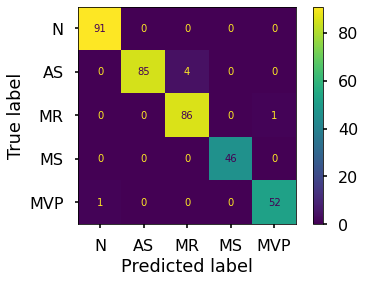

In [40]:
cm = confusion_matrix(y_t, y_p)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=CATEGORIES)
disp.plot()

In [41]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score


In [42]:
# predict crisp classes for test set
# yhat_classes = model.predict_classes(testX, verbose=0)
# print(yhat_classes.shape)
# # # reduce to 1d array
# yhat_probs = yhat_probs[:, 0]
# yhat_classes = yhat_classes[:, 0]
# # # accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_t, y_p)
print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
precision = precision_score(y_t,y_p,average="macro")
print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
recall=recall_score(y_t, y_p, average="macro")
print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_t,y_p,average="macro")
print('F1 score: %f' % f1)

Accuracy: 0.983607
Precision: 0.985164
Recall: 0.984939
F1 score: 0.984886
